In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
more_data = pd.read_csv('Dig-MNIST.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y_train

array([0, 1, 2, ..., 7, 8, 9])

In [82]:
X_train = np.array(train_data.iloc[:,1:].values)/255.0
Y_train = np.array(train_data.iloc[:,0].values)
Y_train = np.array([[(1 if y==i else 0) for i in range(10)] for y in Y_train])
X_test = np.array(more_data.iloc[:,1:].values)/255.0
Y_test = np.array(more_data.iloc[:,0].values)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [89]:
model = Sequential([
    Dense(784, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [90]:
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=20, verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=64, verbose=1, callbacks=[early_stopping])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8900 - loss: 0.3513 - val_accuracy: 0.9803 - val_loss: 0.0684
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9848 - loss: 0.0533 - val_accuracy: 0.9797 - val_loss: 0.0717
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9900 - loss: 0.0340 - val_accuracy: 0.9833 - val_loss: 0.0581
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9934 - loss: 0.0219 - val_accuracy: 0.9842 - val_loss: 0.0697
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9939 - loss: 0.0203 - val_accuracy: 0.9841 - val_loss: 0.0628
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9947 - loss: 0.0169 - val_accuracy: 0.9876 - val_loss: 0.0610
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9961 - loss: 0.0138 - val_accuracy: 0.9864 - val_loss: 0.0714
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9963 - loss: 0.0139 - val_accu

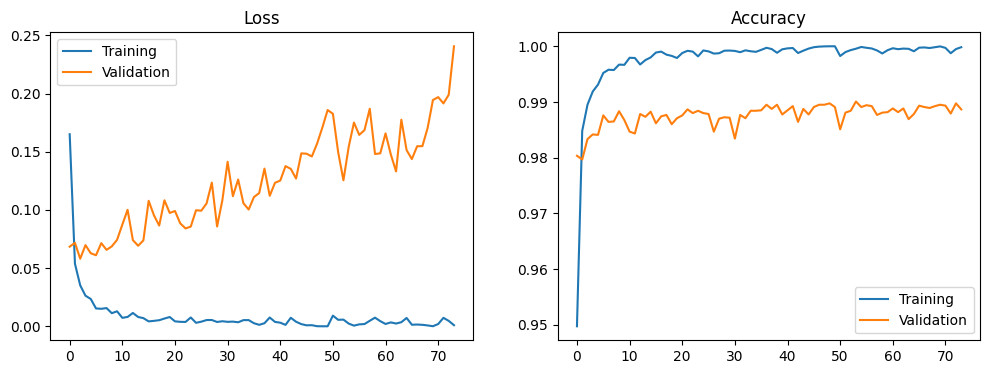

In [91]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()

In [109]:
pred = model.predict(X_test)
Y_pred = [np.argmax(p) for p in pred]
accuracy = np.sum(Y_pred==Y_test)/len(Y_test)
accuracy = f'{accuracy*100:.2f}%'
with open('README.txt','w') as f:
    f.write('Model Accuracy: '+accuracy)
print('Test Accuracy: '+accuracy)

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
Test Accuracy: 68.65%
